In [1]:
# model = 'distilbert-base-uncased'
# model = 'roberta-base'
# model = 'bert-large-uncased'
# model = 'xlnet-base-cased'
model_checkpoint = 'xlnet-large-cased'
# model = 'xlm-roberta-large'
# model = 'microsoft/deberta-v2-xxlarge'

In [2]:
deploying = False

In [3]:
from utils import preprocessing

df, df_test = preprocessing.preprocess_data(deploying=deploying,
                                            train_path='data/SMM4H_2024_Task3_Training_1800.csv',
                                            val_path='data/SMM4H_2024_Task3_Validation_600.csv',
                                            test_path='data/SMM4H_Task3_testposts.csv',
                                            model_checkpoint=model_checkpoint)

Reading data...
Data read...


In [4]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

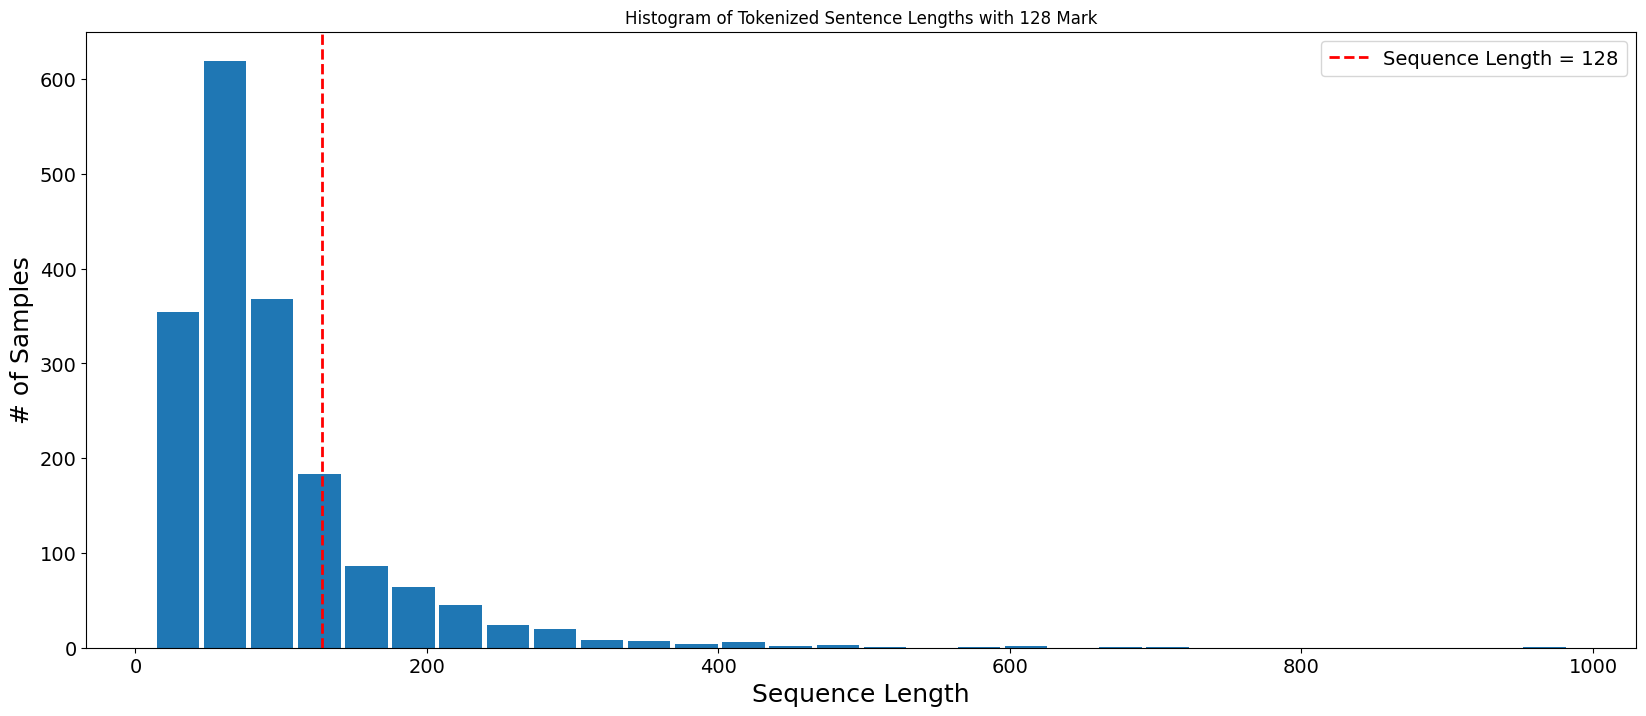

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


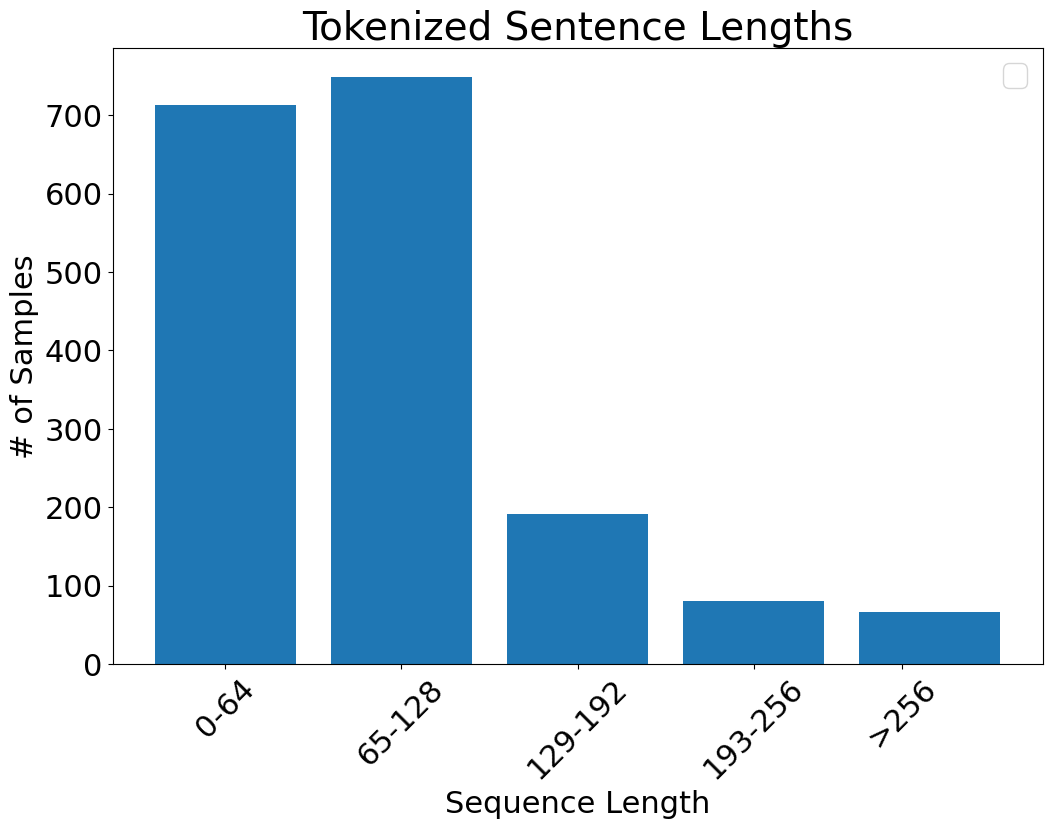

In [5]:
import matplotlib.pyplot as plt

# tokenize the text feature 
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            df.text.values.tolist(), 
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                        )# collect tokenized sentence length 

# Data for plotting
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]

# Histogram with a vertical line at sequence length 128
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, bins=30, rwidth=0.9)  # You can adjust the bin width here
plt.axvline(x=128, color='red', linestyle='dashed', linewidth=2, label='Sequence Length = 128')
plt.xlabel('Sequence Length', fontsize=18)
plt.ylabel('# of Samples', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.title('Histogram of Tokenized Sentence Lengths with 128 Mark')
plt.show()

# Adjust sequence lengths greater than 256
adjusted_lengths = [x if x <= 256 else 320 for x in token_sentence_length]  # Use 300 as a visual trick for '>256'

# Histogram with adjusted binning
plt.figure(figsize=(12, 8))
bins = [0, 64, 128, 192, 256, 320]  # Define custom bins, last bin visually separates '>256'
plt.hist(adjusted_lengths, bins=bins, rwidth=0.8, align='mid')

# Set the x-ticks to reflect the actual bins
plt.xticks([32, 96, 160, 224, 278], ['0-64', '65-128', '129-192', '193-256', '>256'], rotation=45, fontsize=22)

plt.xlabel('Sequence Length', fontsize=22)
plt.ylabel('# of Samples', fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22)
plt.title('Tokenized Sentence Lengths', fontsize=28)
plt.show()


In [6]:
num_gr_128 = len(list(filter(lambda x: x>128, token_sentence_length)))
print('Number of sequences longer than 128:', num_gr_128)
percent_gr_128 = (num_gr_128/len(token_sentence_length))*100
print('Percentage of sequences longer than 128:', percent_gr_128)

Number of sequences longer than 128: 334
Percentage of sequences longer than 128: 18.555555555555557
